In [1]:
import pandas as pd
import numpy as np
import os
import sys
import json

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../data/gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2/features_v2.csv")

In [7]:
data.head()

,session,trial,filename,crest_factor_F1,dasd_F1,diffvar_F1,form_factor_F1,iemg_F1,kurtosis_F1,kurtosis_f_F1,...,rms_W9,skew_W9,skew_f_W9,ssi_W9,sum_f_W9,var_f_W9,wflen_W9,willison_W9,gesture,participant
0,1,1,E:\DS5500-project\data\gesture-recognition-and...,7.091099,0.021834,0.000606,-6502.754507,365.456658,2.574033,85.547962,...,0.022588,-0.148877,5.529415,5.224663,0.109574,2.901826e-10,69.944068,15.0,10,1
1,1,2,E:\DS5500-project\data\gesture-recognition-and...,13.324514,0.023852,0.000689,1352.897349,379.664639,16.942218,329.114870,...,0.016172,-0.205427,9.332349,2.677940,0.077566,2.769772e-10,54.530919,23.0,10,1
2,1,3,E:\DS5500-project\data\gesture-recognition-and...,8.047954,0.016213,0.000326,1295.052394,296.823135,3.795827,134.751765,...,0.017039,-0.204604,9.078430,2.973002,0.064458,1.426359e-10,57.815909,13.0,10,1
3,1,4,E:\DS5500-project\data\gesture-recognition-and...,8.459555,0.026572,0.000864,14453.068135,479.688214,6.938354,98.832790,...,0.031982,-0.266818,5.067522,10.473811,0.131909,4.509337e-10,83.441138,0.0,10,1
4,1,5,E:\DS5500-project\data\gesture-recognition-and...,8.329011,0.026896,0.000901,11827.310277,464.350257,2.379207,116.412205,...,0.031134,-0.092205,5.414199,9.925787,0.177516,9.577100e-10,94.393506,3.0,10,1


In [8]:
MotionName = [ 'Lateral Prehension'  , 'Thumb Adduction'  , 'Thumb and Little Finger Opposition'  ,  
     'Thumb and Index Finger Opposition'  , 'Thumb and Index Finger Extension'  , 'Thumb and Little Finger Extension'  ,  
     'Index and Middle Finger Extension'  , 'Little Finger Extension'  , 'Index Finger Extension'  ,  
     'Thumb Finger Extension'  , 'Wrist Extension'  , 'Wrist Flexion'  ,  
     'Forearm Supination'  , 'Forearm Pronation'  , 'Hand Open'  ,  
     'Hand Close'  ,  'Rest'  ]

In [9]:
motions = {i: val for i,val in zip(range(len(MotionName)), MotionName)}

In [10]:
motions

{0: 'Lateral Prehension',
 1: 'Thumb Adduction',
 2: 'Thumb and Little Finger Opposition',
 3: 'Thumb and Index Finger Opposition',
 4: 'Thumb and Index Finger Extension',
 5: 'Thumb and Little Finger Extension',
 6: 'Index and Middle Finger Extension',
 7: 'Little Finger Extension',
 8: 'Index Finger Extension',
 9: 'Thumb Finger Extension',
 10: 'Wrist Extension',
 11: 'Wrist Flexion',
 12: 'Forearm Supination',
 13: 'Forearm Pronation',
 14: 'Hand Open',
 15: 'Hand Close',
 16: 'Rest'}

## Selecting Motion 2 - Thumb and Little Finger Opposition

In [11]:
df = data[data['gesture'] == 11]

In [12]:
imp_features = ['dasd', 'iemg', 'max', 'min', 'willison', 'wflen', "skew", 'dfivar', 'myopulse', 'p2p', 'mean_f']

In [13]:
def in_list(l, s):
    for i in l:
        if i in s:
            return True
    return False

In [14]:
feature_names = [val for val in df.columns if "_" in val]
w_feature_names = [val for val in df.columns if "_W" in val and in_list(imp_features, val)]

In [15]:
w_feature_names

['dasd_W1',
 'iemg_W1',
 'max_W1',
 'max_f_W1',
 'mean_f_W1',
 'min_W1',
 'myopulse_W1',
 'p2p_W1',
 'skew_W1',
 'skew_f_W1',
 'wflen_W1',
 'willison_W1',
 'dasd_W10',
 'iemg_W10',
 'max_W10',
 'max_f_W10',
 'mean_f_W10',
 'min_W10',
 'myopulse_W10',
 'p2p_W10',
 'skew_W10',
 'skew_f_W10',
 'wflen_W10',
 'willison_W10',
 'dasd_W11',
 'iemg_W11',
 'max_W11',
 'max_f_W11',
 'mean_f_W11',
 'min_W11',
 'myopulse_W11',
 'p2p_W11',
 'skew_W11',
 'skew_f_W11',
 'wflen_W11',
 'willison_W11',
 'dasd_W12',
 'iemg_W12',
 'max_W12',
 'max_f_W12',
 'mean_f_W12',
 'min_W12',
 'myopulse_W12',
 'p2p_W12',
 'skew_W12',
 'skew_f_W12',
 'wflen_W12',
 'willison_W12',
 'dasd_W2',
 'iemg_W2',
 'max_W2',
 'max_f_W2',
 'mean_f_W2',
 'min_W2',
 'myopulse_W2',
 'p2p_W2',
 'skew_W2',
 'skew_f_W2',
 'wflen_W2',
 'willison_W2',
 'dasd_W3',
 'iemg_W3',
 'max_W3',
 'max_f_W3',
 'mean_f_W3',
 'min_W3',
 'myopulse_W3',
 'p2p_W3',
 'skew_W3',
 'skew_f_W3',
 'wflen_W3',
 'willison_W3',
 'dasd_W4',
 'iemg_W4',
 'max_W4',

In [16]:
features = df[feature_names].values
w_features = df[w_feature_names].values

In [17]:
labels = df["gesture"].values
participants = df["participant"].values
sessions = df["session"].values

In [18]:
features

array([[7.90598614e+00, 5.82037032e-02, 4.10698134e-03, ...,
        8.43976610e-09, 1.09261253e+02, 8.00000000e+00],
       [7.47373432e+00, 5.92859215e-02, 4.27759352e-03, ...,
        7.50071524e-09, 1.11205787e+02, 2.70000000e+01],
       [4.95050744e+00, 5.00745027e-02, 3.13209218e-03, ...,
        2.01510943e-09, 1.14999665e+02, 1.20000000e+01],
       ...,
       [5.51177129e+00, 3.83118905e-02, 1.71395546e-03, ...,
        1.14834317e-08, 7.18902040e+01, 0.00000000e+00],
       [5.62730333e+00, 6.99244717e-02, 5.67713898e-03, ...,
        7.24285982e-08, 1.38015754e+02, 4.00000000e+00],
       [8.22052847e+00, 3.96704659e-02, 1.83471360e-03, ...,
        1.30840686e-08, 1.21157578e+02, 4.00000000e+00]])

In [19]:
scaler = StandardScaler()
s_features = scaler.fit_transform(features)
w_scaler = StandardScaler()
s_w_features = w_scaler.fit_transform(features)

In [20]:
tsne = TSNE()
tsne_features = tsne.fit_transform(s_features)

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [21]:
sub_parts = np.random.choice(participants, size = 15, replace=False)

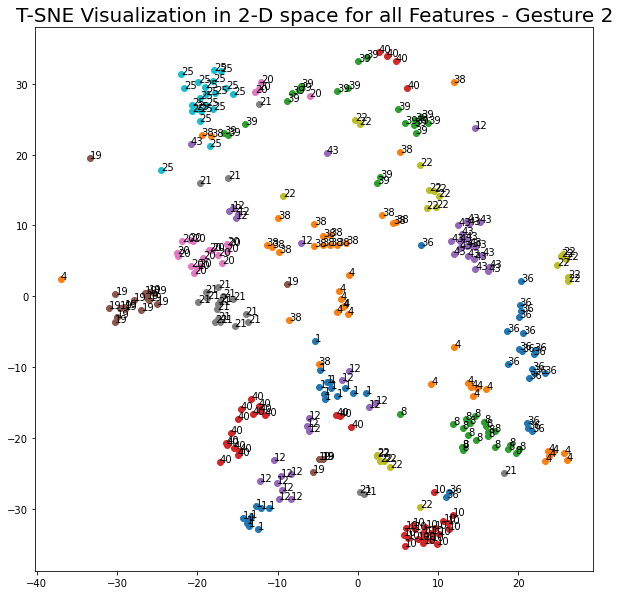

In [22]:
fig, ax = plt.subplots(figsize= (10,10))

# ax.scatter(x = tsne_features[:,0], y = tsne_features[:,1], label = participants)
for p in np.unique(sub_parts):
    i = np.where(participants == p)
    ax.scatter(tsne_features[i,0], tsne_features[i,1], label=p)
#     ax.annotate(p, (tsne_features[i,0], tsne_features[i,1]))
# ax.legend()
for idx, label in enumerate(participants):
    if label in sub_parts:
        ax.annotate(label, (tsne_features[idx,0], tsne_features[idx,1]))
    
ax.set_title("T-SNE Visualization in 2-D space for all Features - Gesture 2", fontsize= 20)
plt.show()

In [23]:
tsne = TSNE()
w_tsne_features = tsne.fit_transform(s_w_features)

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


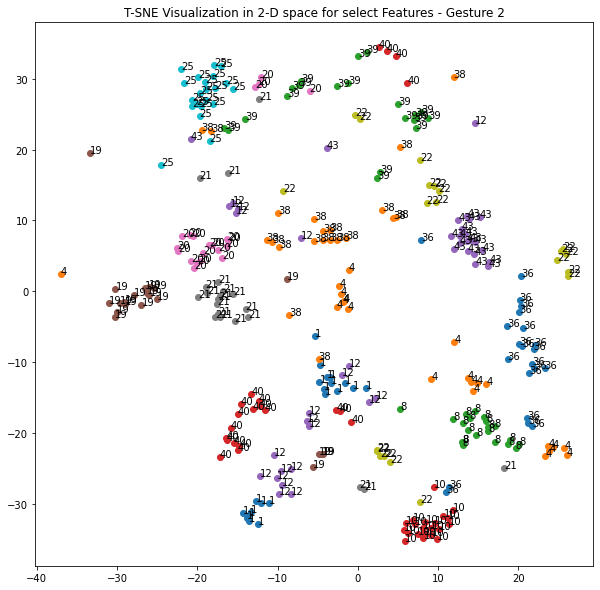

In [24]:
fig, ax = plt.subplots(figsize= (10,10))

# ax.scatter(x = tsne_features[:,0], y = tsne_features[:,1], label = participants)
for p in np.unique(sub_parts):
    i = np.where(participants == p)
    ax.scatter(tsne_features[i,0], tsne_features[i,1], label=p)
#     ax.annotate(p, (tsne_features[i,0], tsne_features[i,1]))
# ax.legend()
for idx, label in enumerate(participants):
    if label in sub_parts:
        ax.annotate(label, (tsne_features[idx,0], tsne_features[idx,1]), fontsize=10)
    
ax.set_title("T-SNE Visualization in 2-D space for select Features - Gesture 2")
plt.show()

In [25]:
plot_df = pd.DataFrame({"x": tsne_features[:,0], "y": tsne_features[:,1], 
                        "x_w": w_tsne_features[:,0], "y_w": w_tsne_features[:,1], 
                        "participants": participants, "sessions":sessions})

In [26]:
plot_df

,x,y,x_w,y_w,participants,sessions
0,-0.606923,-13.559071,4.806103,16.687744,1,1
1,-1.559371,-12.971640,3.860809,17.272005,1,1
2,-5.313755,-6.264092,1.540603,20.406982,1,1
3,-4.051443,-14.447253,4.819598,20.013954,1,1
4,-11.029619,-29.795538,15.553502,31.638342,1,1
...,...,...,...,...,...,...
898,14.114669,-34.630833,29.549297,13.244679,9,3
899,17.991144,-33.454029,33.909431,11.932307,9,3
900,6.599369,0.283211,9.726303,-11.244595,9,3
901,13.188707,-32.575893,32.655384,14.268969,9,3


In [30]:
# sub_parts = np.random.choice(participants, size = 10, replace = False)
sub_parts = [15,16,20,23,35,4,41,8]
sub_plot = plot_df[plot_df['participants'].isin(sub_parts)]
sub_plot["participants"] = "p_" + sub_plot["participants"].astype(str)

C:\Users\tanma\AppData\Local\Temp\ipykernel_30352\2820765834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_plot["participants"] = "p_" + sub_plot["participants"].astype(str)


In [31]:
sub_plot

,x,y,x_w,y_w,participants,sessions
42,16.581062,-35.983006,30.538349,11.078815,p_15,1
43,17.731739,-35.643234,31.758112,10.488924,p_15,1
44,17.995039,-34.849949,32.672077,10.786083,p_15,1
45,20.762655,-32.945156,36.073414,9.728173,p_15,1
46,20.810720,-32.928467,36.132832,9.699077,p_15,1
...,...,...,...,...,...,...
891,15.982207,-18.282896,25.890923,-0.116802,p_8,3
892,16.271990,-19.054947,26.631491,0.417672,p_8,3
893,18.912041,-20.919638,30.147470,0.445774,p_8,3
894,11.897043,-17.914022,22.315203,2.307809,p_8,3


Text(0.5, 1.0, 'T-SNE Visualization of feature space in 2D - gesture 11')

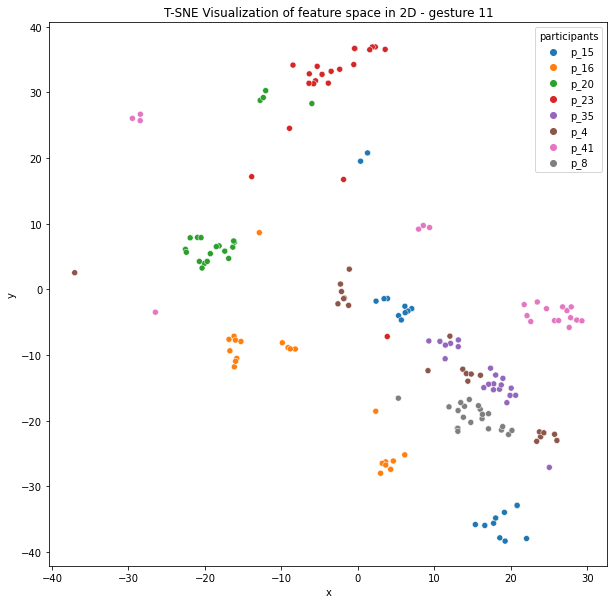

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = sub_plot, x = "x", y = "y", 
                hue = "participants", 
                hue_order=sub_plot['participants'].unique(), ax = ax)
ax.set_title("T-SNE Visualization of feature space in 2D - gesture 11")



In [33]:
# sub_parts = np.random.choice(participants, size = 10, replace = False)
sub_parts = [8,16,35]
sub_plot = plot_df[plot_df['participants'].isin(sub_parts)]
# sub_plot["participants"] = "p_" + sub_plot["participants"].astype(str)
sub_plot["label"] = "P:" + sub_plot["participants"].astype(str)+ "-S:" + sub_plot["sessions"].astype(str)

C:\Users\tanma\AppData\Local\Temp\ipykernel_30352\2724014204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_plot["label"] = "P:" + sub_plot["participants"].astype(str)+ "-S:" + sub_plot["sessions"].astype(str)


In [34]:
sub_plot

,x,y,x_w,y_w,participants,sessions,label
49,4.622980,-26.162975,19.790344,14.053990,16,1,P:16-S:1
50,4.269836,-27.425848,20.281483,15.330325,16,1,P:16-S:1
51,6.114198,-25.228151,20.620771,12.496794,16,1,P:16-S:1
52,3.621736,-26.294821,18.997307,14.762767,16,1,P:16-S:1
53,2.948537,-28.028711,19.831415,16.653913,16,1,P:16-S:1
...,...,...,...,...,...,...,...
891,15.982207,-18.282896,25.890923,-0.116802,8,3,P:8-S:3
892,16.271990,-19.054947,26.631491,0.417672,8,3,P:8-S:3
893,18.912041,-20.919638,30.147470,0.445774,8,3,P:8-S:3
894,11.897043,-17.914022,22.315203,2.307809,8,3,P:8-S:3


In [35]:
sub_plot.isna().sum()

x               0
y               0
x_w             0
y_w             0
participants    0
sessions        0
label           0
dtype: int64

In [36]:
palette = {
    8: 'tab:blue',
    16: 'tab:green',
    35: 'tab:orange',
}

Text(0.5, 1.0, 'T-SNE Visualization of feature space in 2D - gesture 11 - Multi-session')

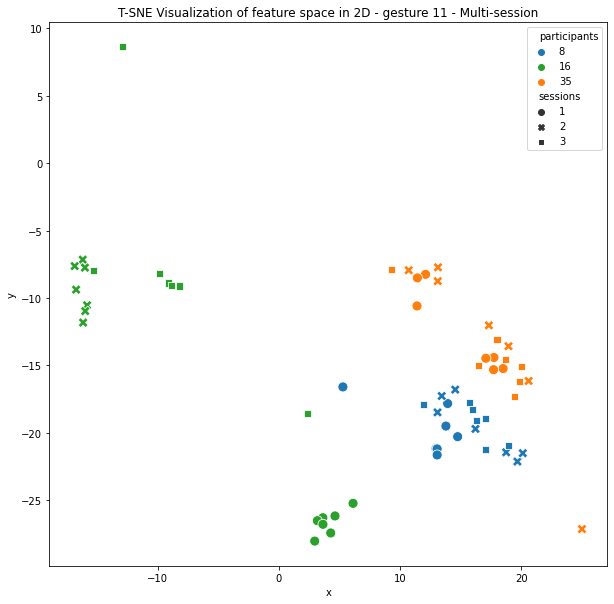

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = sub_plot, x = "x", y = "y", 
                hue = "participants", style="sessions", ax = ax, palette=palette, s=100)
ax.set_title("T-SNE Visualization of feature space in 2D - gesture 11 - Multi-session")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

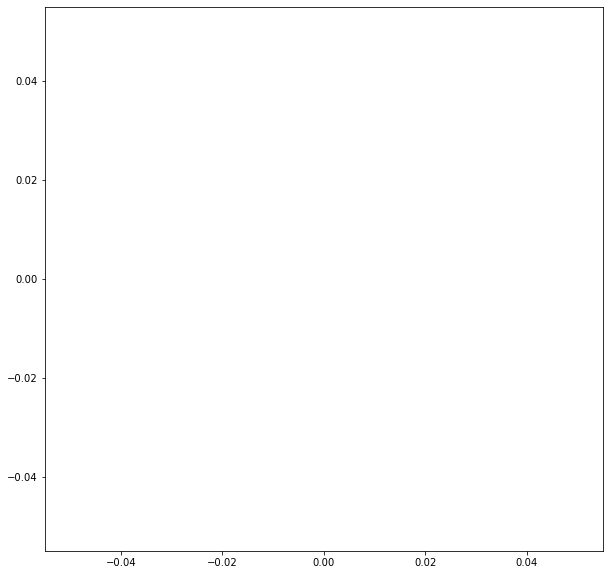

In [123]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = sub_plot, x = "x_w", y = "y_w", 
                hue = "label", 
                hue_order=sub_plot['participants'].unique(), ax = ax)


In [210]:
sub_plot['participants'].unique()

array([ 1, 14, 18, 25, 29, 30, 40, 41, 43,  9], dtype=int64)

In [212]:
sub_plot

,x,y,x_w,y_w,participants
0,-11.897119,-18.426947,-13.967483,18.676064,1
1,-9.910731,-15.785324,-15.120059,16.522352,1
2,-10.824736,-17.747097,-15.420291,18.289194,1
3,-9.840913,-18.265072,-16.145247,19.175507,1
4,-11.234580,-16.832285,-16.907900,17.764923,1
...,...,...,...,...,...
898,-15.959660,18.683449,6.936076,-10.413298,9
899,-15.453485,23.359997,11.827537,-32.362740,9
900,-15.617821,22.485104,11.262092,-31.889332,9
901,-15.158956,23.401012,11.655236,-32.599918,9


In [153]:
pca = PCA(2)
pca_features = pca.fit_transform(s_features)

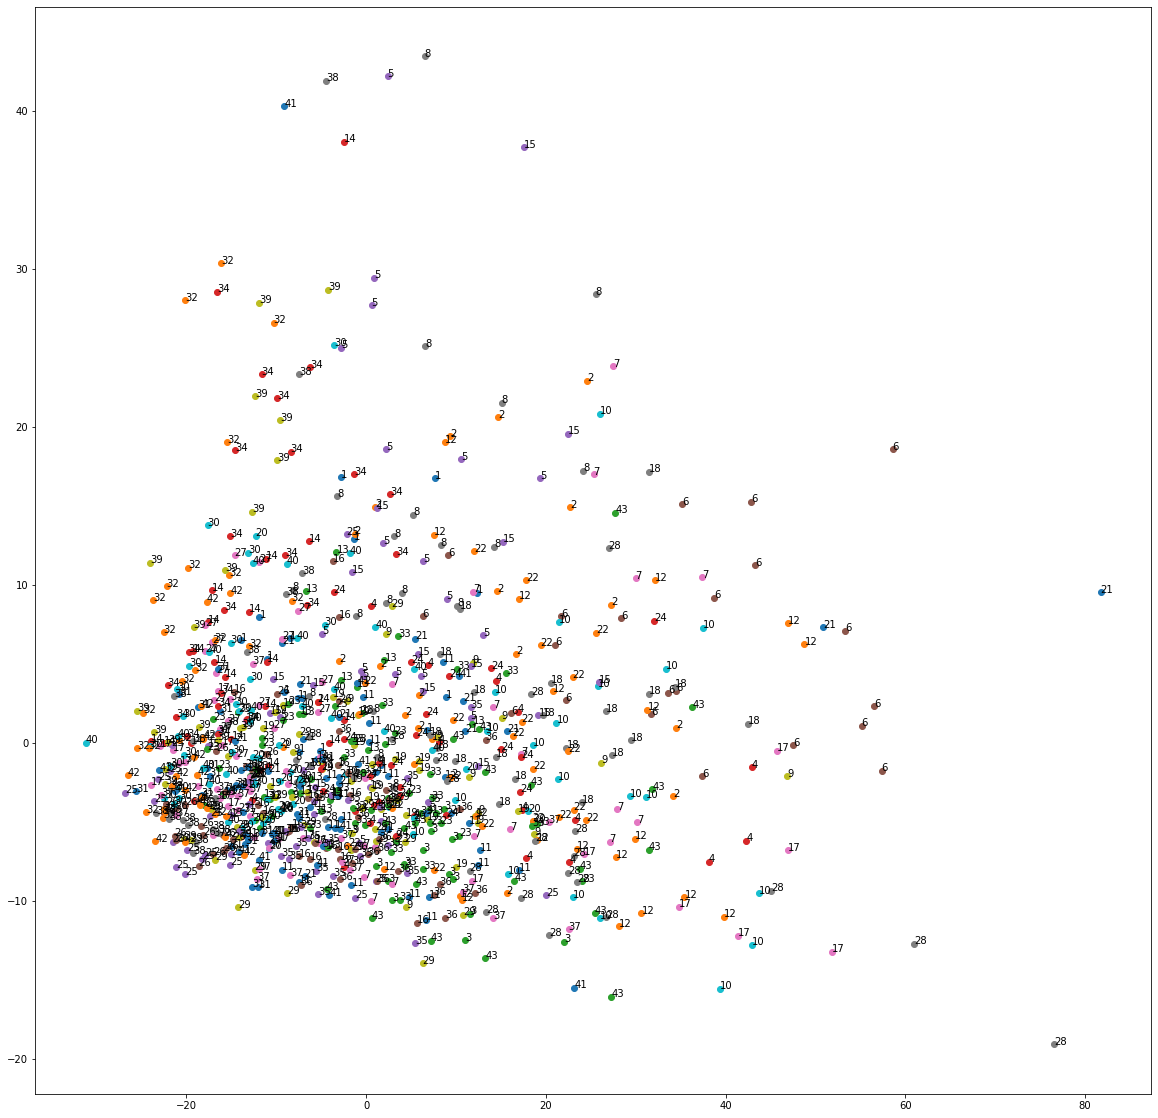

In [154]:
fig, ax = plt.subplots(figsize= (20,20))

# ax.scatter(x = pca_features[:,0], y = pca_features[:,1], label = participants)
for p in np.unique(participants):
    i = np.where(participants == p)
    ax.scatter(pca_features[i,0], pca_features[i,1], label=p)
#     ax.annotate(p, (pca_features[i,0], pca_features[i,1]))
# ax.legend()
for idx, label in enumerate(participants):
    ax.annotate(label, (pca_features[idx,0], pca_features[idx,1]), fontsize=10)

In [45]:
import torch

In [58]:
s = torch.rand((2,2,10))

In [60]:
s[:,-1,:].shape

torch.Size([2, 10])

In [57]:
s.squeeze(1).shape

torch.Size([2, 10])

In [70]:
a = torch.rand((2, 5, 2))
b = torch.rand((2, 2, 3))

In [71]:
torch.matmul(a,b).shape

torch.Size([2, 5, 3])

In [74]:
torch.matmul(a,b)

tensor([[[0.9822, 0.6159, 0.5801],
         [1.0033, 0.5882, 0.5597],
         [0.3678, 0.4867, 0.4232],
         [1.3110, 1.2558, 1.1231],
         [0.9466, 0.7867, 0.7145]],

        [[0.2956, 0.1643, 0.2431],
         [0.5326, 0.4626, 0.5248],
         [0.5978, 0.5322, 0.5958],
         [0.2687, 0.1268, 0.2092],
         [0.6320, 0.5236, 0.6095]]])

In [76]:
torch.matmul(a[1], b[1])

tensor([[0.2956, 0.1643, 0.2431],
        [0.5326, 0.4626, 0.5248],
        [0.5978, 0.5322, 0.5958],
        [0.2687, 0.1268, 0.2092],
        [0.6320, 0.5236, 0.6095]])

In [77]:
a = torch.rand((2, 5, 2))
b = torch.rand((2, 3))

In [78]:
torch.matmul(a,b)

tensor([[[0.4732, 0.1615, 0.1696],
         [0.2367, 0.0365, 0.1335],
         [0.5715, 0.2030, 0.1960],
         [0.9730, 0.2569, 0.4313],
         [0.3253, 0.0539, 0.1793]],

        [[0.4059, 0.1362, 0.1480],
         [0.7936, 0.1323, 0.4368],
         [0.4933, 0.1935, 0.1490],
         [0.7790, 0.0664, 0.4985],
         [0.3550, 0.1323, 0.1148]]])

In [79]:
torch.matmul(a[0], b)

tensor([[0.4732, 0.1615, 0.1696],
        [0.2367, 0.0365, 0.1335],
        [0.5715, 0.2030, 0.1960],
        [0.9730, 0.2569, 0.4313],
        [0.3253, 0.0539, 0.1793]])

In [80]:
torch.matmul(a[1], b)

tensor([[0.4059, 0.1362, 0.1480],
        [0.7936, 0.1323, 0.4368],
        [0.4933, 0.1935, 0.1490],
        [0.7790, 0.0664, 0.4985],
        [0.3550, 0.1323, 0.1148]])

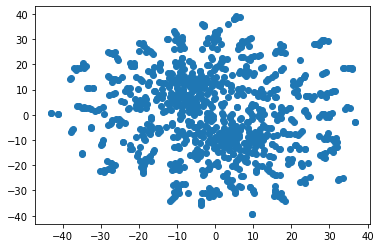

In [47]:
plt.scatter(x = tsne_features[:,0], y = tsne_features[:,1], )

In [137]:
tsne_features.shape

(903, 2)

In [141]:
tsne = TSNE(2)
tsne_features = tsne.fit_transform(s_features)

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [134]:
#Trying with DBSCAN
dbs = DBSCAN(2)
pred_labels = dbs.fit_predict(tsne_features)



In [148]:
agc = AgglomerativeClustering(n_clusters = 20)

In [149]:
pred_labels = agc.fit_predict(tsne_features)

In [150]:
pred_labels

array([ 5, 18,  5,  4,  5, 18, 10,  2,  1,  1,  1, 11,  1,  6,  4,  4,  4,
        4,  4, 16,  4,  1,  1,  1,  1,  1,  1,  1, 10, 19, 19, 19, 19, 19,
       10,  5,  9, 18, 18, 18, 18, 18,  6,  6,  6,  6, 10,  6,  6, 17, 17,
       17, 17,  3, 17, 17,  1,  1,  1,  1,  1, 16,  1, 11, 11,  4, 11, 11,
       11, 14, 10, 10, 10, 10, 19, 19, 19,  1, 19,  6,  1,  6,  6,  6, 10,
       10, 16, 16, 16,  3, 16,  1, 12, 12, 11,  1, 16, 16,  6,  6,  6,  6,
        6, 11,  6, 16, 16, 16, 16, 10, 16, 16,  8,  8,  8,  8,  8,  8,  8,
       18,  4,  7,  7,  4,  7,  4, 15, 15, 15, 15, 15, 15, 18, 18,  2, 13,
       12, 18, 13, 18,  3,  3,  3,  3,  3,  1,  3,  4,  4,  4,  4,  4,  4,
        4,  8, 10,  8,  8,  8,  8,  8,  0,  0,  9,  0,  0,  0, 13,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  2,  2,  2,  2,
        2,  2,  5,  5,  5,  5,  5,  5,  5, 19, 19, 15, 12, 12, 12, 12,  3,
        3,  3,  3,  3,  3, 11,  4,  1,  4,  3,  3,  3,  1,  7,  7,  7,  7,
        5,  9,  5,  9,  9

In [155]:
tsne_features[idx,0]

15.456853

1 5
1 18
1 5
1 4
1 5
1 18
1 10
10 2
10 1
10 1
10 1
10 11
10 1
10 6
11 4
11 4
11 4
11 4
11 4
11 16
11 4
12 1
12 1
12 1
12 1
12 1
12 1
12 1
13 10
13 19
13 19
13 19
13 19
13 19
13 10
14 5
14 9
14 18
14 18
14 18
14 18
14 18
15 6
15 6
15 6
15 6
15 10
15 6
15 6
16 17
16 17
16 17
16 17
16 3
16 17
16 17
17 1
17 1
17 1
17 1
17 1
17 16
17 1
18 11
18 11
18 4
18 11
18 11
18 11
18 14
19 10
19 10
19 10
19 10
19 19
19 19
19 19
2 1
2 19
2 6
2 1
2 6
2 6
2 6
20 10
20 10
20 16
20 16
20 16
20 3
20 16
21 1
21 12
21 12
21 11
21 1
21 16
21 16
22 6
22 6
22 6
22 6
22 6
22 11
22 6
23 16
23 16
23 16
23 16
23 10
23 16
23 16
24 8
24 8
24 8
24 8
24 8
24 8
24 8
25 18
25 4
25 7
25 7
25 4
25 7
25 4
26 15
26 15
26 15
26 15
26 15
26 15
26 18
27 18
27 2
27 13
27 12
27 18
27 13
27 18
28 3
28 3
28 3
28 3
28 3
28 1
28 3
29 4
29 4
29 4
29 4
29 4
29 4
29 4
3 8
3 10
3 8
3 8
3 8
3 8
3 8
30 0
30 0
30 9
30 0
30 0
30 0
30 13
31 0
31 0
31 0
31 0
31 0
31 0
31 0
32 0
32 0
32 0
32 0
32 0
32 0
32 0
33 3
33 2
33 2
33 2
33 2
33 2
33 2
34

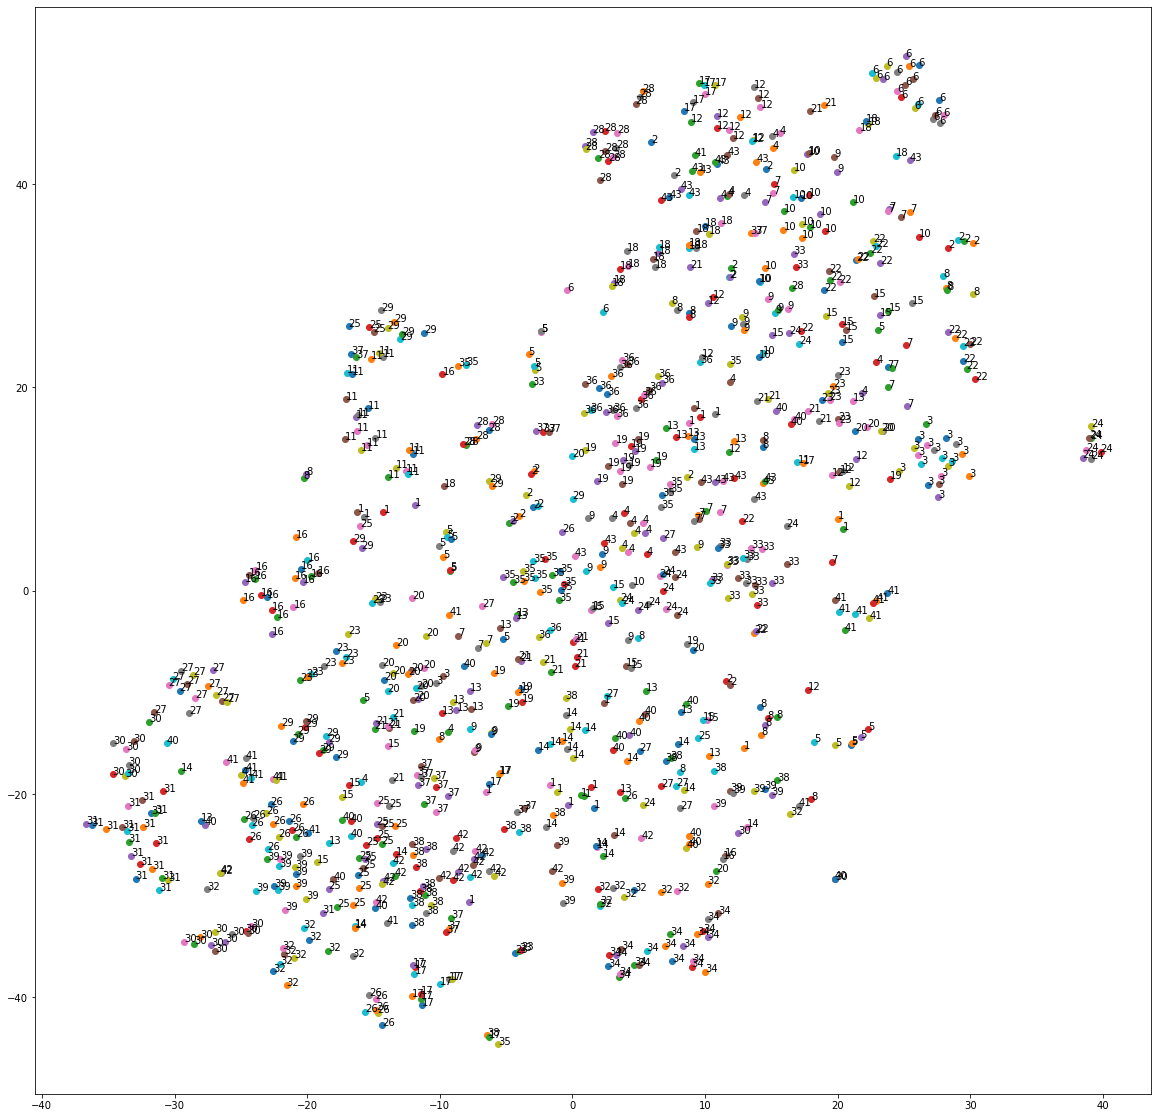

In [151]:
fig, ax = plt.subplots(figsize= (20,20))

# ax.scatter(x = tsne_features[:,0], y = tsne_features[:,1], label = participants)
for idx, c in enumerate(pred_labels):
#     i = np.where(participants == p)
    ax.scatter(tsne_features[idx,0], tsne_features[idx,1], label=c)
    ax.annotate(participants[idx], (tsne_features[idx,0], tsne_features[idx,1]), fontsize=10)
#     print(participants[idx], c)
# ax.annotate(p, (tsne_features[i,0], tsne_features[i,1]))
# # ax.legend()
# for idx, label in enumerate(participants):
#     ax.annotate(label, (tsne_features[idx,0], tsne_features[idx,1]), fontsize=10)

In [147]:
participants


array([ 1,  1,  1,  1,  1,  1,  1, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 19, 19, 19, 19, 19, 19, 19,  2,  2,  2,  2,  2,  2,  2, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22,
       22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24,
       25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29,
       29,  3,  3,  3,  3,  3,  3,  3, 30, 30, 30, 30, 30, 30, 30, 31, 31,
       31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
       33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36,
       36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38,
       38, 38, 38, 39, 39